In [34]:
from datetime import datetime

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')

In [2]:
df = tickers.download(period="2y")

[*********************100%***********************]  28 of 28 completed


In [8]:
# Save data to CSV
df.to_csv('df.csv')

In [17]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2024-01-01', end = '2024-12-31')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...
Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...
Processing CLH...
Processing VEOEY...
Processing CWST...
Processing SRCL...
Error fetching info for SRCL: list index out of range
Processing CWY.AX...
Processing TMRAY...
Processing SYM...
Processing GXO...
Processing AUTO.OL...
Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing DAIUF...
Processing MANH...
Processing BKW.SW...
Processing ENLAY...
Processing NEE...
Processing IBDRY...
Processing DNNGY...
Processing FSLR...
Processing ENR.DE...


In [18]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$70.77B,1.09M,19.48,N/A,19.482814
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.59B,0.18M,37.87,N/A,37.865368
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$23.82B,1.51M,26.25,N/A,26.252681
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$29.03B,1.24M,3.43,N/A,3.425050
4,GF.SW,GEORG FISCHER N,Georg Fischer AG engages in the provision of p...,$5.42B,0.16M,17.18,N/A,17.177645
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$91.65B,1.62M,14.23,N/A,14.231267
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$17.97B,1.2M,31.30,N/A,31.296606
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.62B,0.3M,34.88,N/A,34.880453
8,VEOEY,Veolia Environnement,Veolia Environnement SA designs and provides w...,$25.34B,0.13M,-6.12,N/A,-6.117010
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$7.01B,0.31M,24.49,N/A,24.492203


In [19]:
# Display the data
df

Price           Close                                                 \
Ticker        AUTO.OL      BKW.SW         BMI       CGNX         CLH   
Date                                                                   
2023-03-28  21.090000  134.768311         NaN        NaN         NaN   
2023-03-29  22.590000  134.960159  118.322998  47.222176  135.149994   
2023-03-30  23.900000  137.070389  118.194702  47.990822  138.759995   
2023-03-31  22.469999  137.933685  120.237816  48.828442  142.559998   
2023-04-03  23.020000  137.070389  121.994705  48.552517  140.919998   
...               ...         ...         ...        ...         ...   
2025-03-24  10.300000  148.699997  194.179993  31.570000  200.300003   
2025-03-25   9.965000  149.000000  195.750000  31.250000  200.740005   
2025-03-26   9.810000  150.600006  192.380005  31.280001  199.419998   
2025-03-27   9.915000  153.100006  193.199997  30.740000  199.429993   
2025-03-28   9.625000  154.500000  190.210007  30.010000  197.149994   

Price                                                           ...    Volume  \
Ticker            CWST    CWY.AX      DAIUF  DNNGY         ECL  ...      MANH   
Date                                                            ...             
2023-03-28         NaN  2.307996        NaN    NaN         NaN  ...       NaN   
2023-03-29   80.370003  2.307996   0.037695  26.82  158.839920  ...  152900.0   
2023-03-30   80.790001  2.307996  -0.129047  28.10  159.867950  ...  146700.0   
2023-03-31   82.660004  2.288763  -0.129047  28.24  162.070969  ...  258500.0   
2023-04-03   81.860001  2.288763  -0.131488  28.41  162.550705  ...  269300.0   
...                ...       ...        ...    ...         ...  ...       ...   
2025-03-24  110.820000  2.630000  26.600000  15.25  252.619995  ...  745300.0   
2025-03-25  112.730003  2.640000  26.600000  15.08  251.199997  ...  671500.0   
2025-03-26  110.690002  2.630000  26.600000  14.77  252.389999  ...  491600.0   
2025-03-27  110.739998  2.620000  26.600000  14.92  252.679993  ...  358300.0   
2025-03-28  110.699997  2.610000  24.350000  14.99  249.509995  ...  691700.0   

Price                                                                       \
Ticker             NEE       SRCL        SYM    TMRAY     VEOEY       VLTO   
Date                                                                         
2023-03-28         NaN        NaN        NaN      NaN       NaN        NaN   
2023-03-29   5680500.0   274502.0   204400.0    200.0  237400.0        NaN   
2023-03-30   6187000.0  1036385.0   334600.0      0.0  910600.0        NaN   
2023-03-31  10124400.0   522070.0   352200.0   1600.0   57200.0        NaN   
2023-04-03   5778700.0   357767.0   488900.0   2300.0  477600.0        NaN   
...                ...        ...        ...      ...       ...        ...   
2025-03-24  12385400.0        NaN  1085500.0   1200.0   77600.0  1094000.0   
2025-03-25  12618800.0        NaN   817600.0    800.0   60700.0  1201900.0   
2025-03-26   9156000.0        NaN   958500.0   1200.0  149300.0  1489900.0   
2025-03-27   8748800.0        NaN   912200.0  31700.0   46900.0   947700.0   
2025-03-28   7846300.0        NaN  1620700.0  19900.0   51600.0   834900.0   

Price                                       
Ticker             WM        XYL      ZBRA  
Date                                        
2023-03-28        NaN        NaN       NaN  
2023-03-29  1514500.0  1452500.0  214700.0  
2023-03-30  3074700.0   949300.0  302600.0  
2023-03-31  3115600.0  2059400.0  373400.0  
2023-04-03  2043700.0  1638800.0  199800.0  
...               ...        ...       ...  
2025-03-24  1519100.0  2251800.0  512000.0  
2025-03-25  1622500.0  1745400.0  348900.0  
2025-03-26  1268200.0  1643300.0  319900.0  
2025-03-27  1354100.0  1625200.0  236500.0  
2025-03-28  1264800.0  1589700.0  289700.0  

[518 rows x 196 columns]

In [40]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df['Close'].to_csv(filename, index=False)

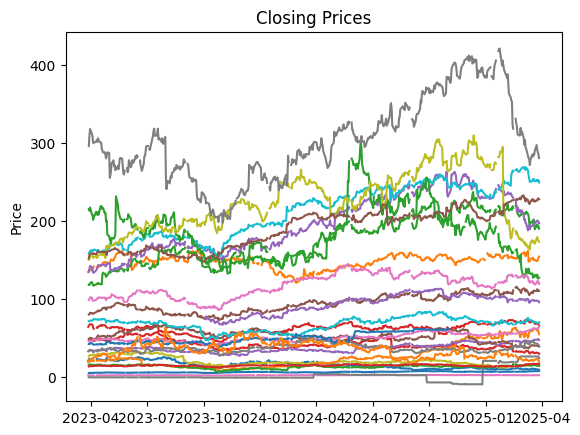

In [21]:
# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

In [23]:
df_normalized_closed = df['Close'] - df['Close'].iloc[0]
df_normalized_closed

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,DAIUF,DNNGY,ECL,...,MANH,NEE,SRCL,SYM,TMRAY,VEOEY,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-29,1.500000,0.191849,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-30,2.809999,2.302078,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,1.379999,3.165375,NaN,NaN,NaN,NaN,-0.019233,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-03,1.930000,2.302078,NaN,NaN,NaN,NaN,-0.019233,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,-10.790000,13.931686,NaN,NaN,NaN,NaN,0.322004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-25,-11.125000,14.231689,NaN,NaN,NaN,NaN,0.332004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,-11.280000,15.831696,NaN,NaN,NaN,NaN,0.322004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


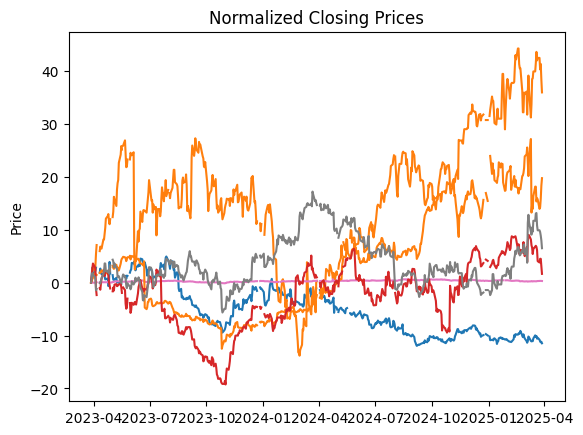

In [25]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [26]:
# Add a new column to the DataFrame with daily differences
df_diff = df['Close'].diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,DAIUF,DNNGY,ECL,...,MANH,NEE,SRCL,SYM,TMRAY,VEOEY,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-05,0.200000,2.243698,-0.118805,0.069176,-0.600006,1.430000,0.009712,0.0,0.170001,-1.152359,...,0.169998,-1.118504,0.240002,0.000000,0.315680,0.047909,-3.333626,0.743393,-1.061447,-8.400009
2023-10-06,-1.070000,0.975525,0.623856,0.177883,0.100006,0.200005,0.019425,0.0,-0.010000,1.083420,...,7.340012,0.755230,0.029999,3.029999,0.582033,0.220376,3.512741,0.704269,0.815735,1.310013
2023-10-09,-0.155000,0.682861,0.039612,-0.760941,1.830002,0.919998,0.019424,0.0,0.230000,-1.831924,...,1.360001,-0.879509,0.510002,1.940002,-0.118380,-0.067071,-3.353523,1.995468,0.117935,-1.270004
2023-10-10,-0.120000,1.658386,0.178253,0.128471,1.399994,0.409996,0.009712,0.0,1.240000,1.428116,...,1.479996,2.160526,0.809998,2.719997,0.039460,0.277866,0.388092,-0.616241,0.845207,-0.180008
2023-10-11,0.099999,1.268188,-1.861710,-0.573170,2.229996,-0.479996,0.038849,0.0,0.070000,0.610626,...,-0.199997,1.873726,0.100002,2.310001,-0.177569,-0.095817,-0.527405,-0.166306,0.412788,-5.239990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,0.380000,0.199997,2.312622,0.378353,2.649994,1.019997,-0.019781,0.0,0.135000,2.944641,...,-0.309998,1.418732,-0.029999,0.990000,-0.010000,0.440000,-0.049950,1.449722,0.367813,3.489990
2024-10-29,0.110001,-1.500000,-0.358841,1.374012,6.870026,1.380005,-0.029672,0.0,-0.770000,-2.676056,...,1.869995,-3.261093,0.149998,1.110001,0.370000,-0.049999,-0.509453,10.773727,-0.894699,21.100006
2024-10-30,-0.240001,-3.000000,0.966919,-0.139393,-28.240021,-1.120003,-0.049453,0.0,-0.340000,-1.153961,...,-11.470001,-0.463066,0.440002,0.439999,-0.330000,-0.080000,-0.249733,-4.259842,0.328049,-0.789978


In [42]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df['Close'].pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


C:\Users\Admin\AppData\Local\Temp\ipykernel_15296\2304432040.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_diff_relative = df['Close'].pct_change()


Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,DAIUF,DNNGY,ECL,...,MANH,NEE,SRCL,SYM,TMRAY,VEOEY,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-05,0.013962,0.015132,-0.000842,0.001671,-0.003691,0.019034,0.004273,0.000000,0.010712,-0.006898,...,0.000853,-0.023113,0.005701,0.000000,0.031008,0.003613,-0.043059,0.004936,-0.011840,-0.036373
2023-10-06,-0.073666,0.006481,0.004425,0.004289,0.000617,0.002612,0.008511,0.000000,-0.000623,0.006531,...,0.036790,0.015976,0.000709,0.095163,0.055451,0.016559,0.047414,0.004653,0.009208,0.005887
2023-10-09,-0.011520,0.004507,0.000280,-0.018268,0.011291,0.011985,0.008439,0.000000,0.014348,-0.010971,...,0.006575,-0.018312,0.012037,0.055635,-0.010686,-0.004957,-0.043216,0.013124,0.001319,-0.005673
2023-10-10,-0.009023,0.010897,0.001259,0.003142,0.008541,0.005278,0.004184,0.000000,0.076261,0.008648,...,0.007108,0.045823,0.018890,0.073893,0.003600,0.020641,0.005227,-0.004000,0.009441,-0.000809
2023-10-11,0.007587,0.008244,-0.013128,-0.013972,0.013490,-0.006147,0.016667,0.000000,0.004000,0.003666,...,-0.000954,0.037999,0.002289,0.058437,-0.016143,-0.006974,-0.007067,-0.001084,0.004568,-0.023561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,-0.035581,-0.011960,0.024751,0.021022,0.019702,0.003259,0.011539,0.000000,-0.038462,0.006454,...,0.040274,-0.011428,0.000000,0.049576,-0.052329,0.002350,0.005012,0.005913,0.019667,0.025587
2025-03-25,-0.032524,0.002018,0.008085,-0.010136,0.002197,0.017235,0.003802,0.000000,-0.011148,-0.005621,...,0.008878,-0.021122,0.000000,-0.005106,0.020202,0.009965,-0.005190,0.003669,0.018957,-0.021486
2025-03-26,-0.015554,0.010738,-0.017216,0.000960,-0.006576,-0.018096,-0.003788,0.000000,-0.020557,0.004737,...,-0.021888,0.016621,0.000000,-0.052609,-0.013861,-0.012188,-0.000205,0.008191,0.000325,-0.010309


In [43]:
# Add a new column 'Volatility' to DataFrame df_mini
# Calculate the volatility of each stock in the past year based on normalized closing prices
df_mini = pd.DataFrame()

df_mini['Volatility'] = df_diff_relative.std()

df_mini

,Volatility
Ticker,
AUTO.OL,0.035590
BKW.SW,0.013171
BMI,0.017981
CGNX,0.023150
CLH,0.016890
CWST,0.014385
CWY.AX,0.015509
DAIUF,0.445772
DNNGY,0.029880


In [44]:
# Calculate final weighting based on volatility 
df_mini['Inverse Volatility'] = 1 / df_mini['Volatility']
sum_inverse_volatility = df_mini['Inverse Volatility'].sum()
df_mini['Volatility Weighting'] = df_mini['Inverse Volatility'] / sum_inverse_volatility
df_mini['Volatility Weighting (%)'] = (df_mini['Volatility Weighting'] * 100).round(2)
df_mini


,Volatility,Inverse Volatility,Volatility Weighting,Volatility Weighting (%)
Ticker,,,,
AUTO.OL,0.035590,28.097611,0.018664,1.87
BKW.SW,0.013171,75.924300,0.050433,5.04
BMI,0.017981,55.613006,0.036941,3.69
CGNX,0.023150,43.196781,0.028694,2.87
CLH,0.016890,59.206895,0.039328,3.93
CWST,0.014385,69.517360,0.046177,4.62
CWY.AX,0.015509,64.479273,0.042831,4.28
DAIUF,0.445772,2.243300,0.001490,0.15
DNNGY,0.029880,33.467744,0.022231,2.22


In [45]:
# Print number of stocks:
print(f"Number of stocks: {len(df_mini)}")

Number of stocks: 28


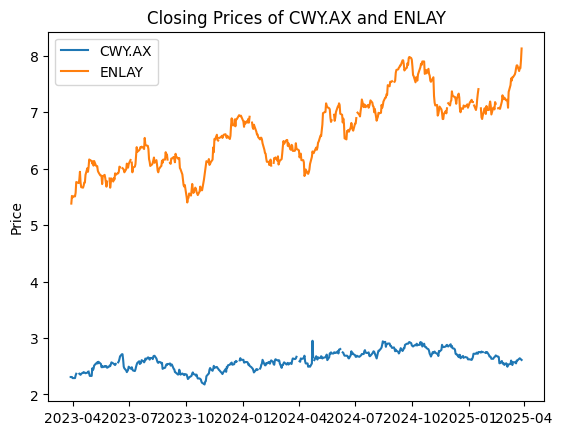

In [46]:
# Plot closing price of CWY.AX and ENLAY
plt.plot(df['Close']['CWY.AX'], label='CWY.AX')
plt.plot(df['Close']['ENLAY'], label='ENLAY')
plt.legend()
plt.title('Closing Prices of CWY.AX and ENLAY')
plt.ylabel('Price')
plt.show()

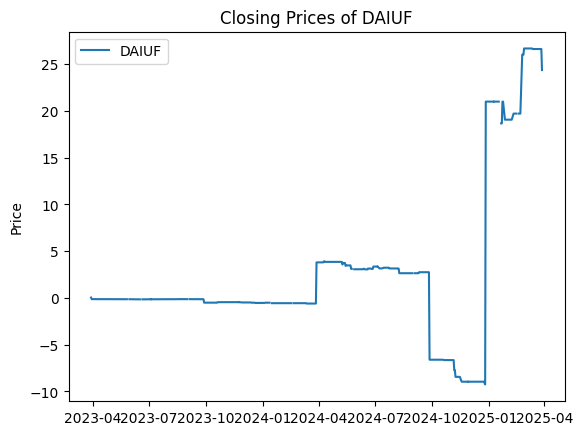

In [48]:
# Plot closing price of DAIUF
plt.plot(df['Close']['DAIUF'], label='DAIUF')
plt.legend()
plt.title('Closing Prices of DAIUF')
plt.ylabel('Price')
plt.show()


In [47]:
# Calculate sum of final weighting to verify correctness
sum_final_weighting = df_mini['Volatility Weighting'].sum()
sum_final_weighting

np.float64(0.9999999999999998)